# HW 4 
## 융합전자공학부 2015003209 석정우
### Local 환경에서 pytorch 설치에 오류가 있어서 구글 colab으로 작성하였습니다.

### Load MNIST dataset from PyTorch

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True)

### Data type conversion

In [283]:
# Change data type : torch.Tensor -> numpy array
X = train_dataset.train_data.numpy()
y = train_dataset.train_labels.numpy()
print('Data size: ' + str(X.shape))

num_samples, height, width = X.shape 
dim = height * width

Data size: (60000, 28, 28)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


### Data visualization

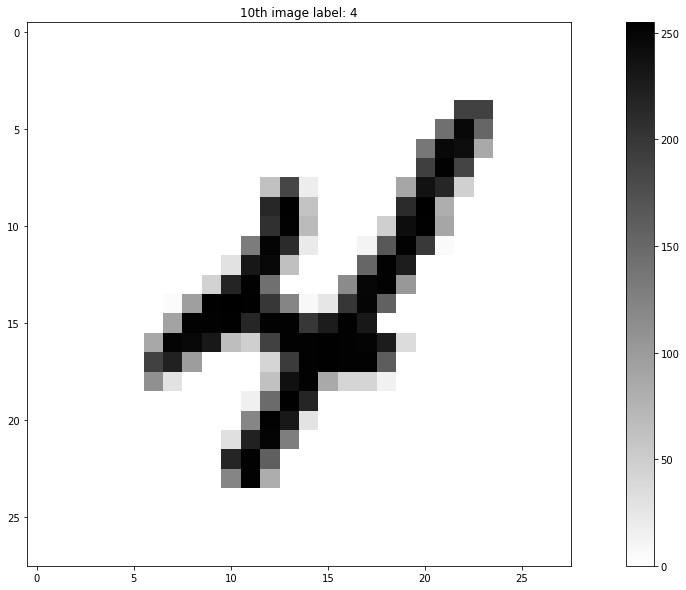

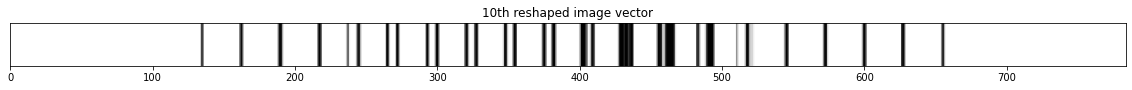

In [284]:
# 10th Image이므로 n=10으로 설정.
n = 10

# Visualize MNIST data (1st digit)
plt.figure(figsize=(20, 10))
plt.imshow(X[n-1], cmap='gray_r')
plt.title("{}th image label: {}".format(n, y[n-1]))
plt.colorbar()
plt.show()

# Visualize MNIST data in a vector form (1st digit)
# 벡터화 하기위해서 reshape(1, dim)사용
vectorX_temp = X[n-1].reshape(1, dim)
plt.figure(figsize=(20, 10))
plt.imshow(vectorX_temp,aspect='30',cmap='gray_r')
plt.title("{}th reshaped image vector".format(n))
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom Edge are off
    right=False,         # ticks along the top Edge are off
    labelleft=False) # labels along the bottom Edge are off
plt.show()

### Principal Component Analysis (PCA)

In [285]:
# Step 0: Vectorize all images
# 모든 X를 vectorX로 변환
vectorX=[]
for x in X:
    vectorX.append(x.reshape(dim))
vectorX = np.array(vectorX)
vectorX.shape

(60000, 784)

In [286]:
# Step 1: Subtract the mean
# 각각의 image에 대해서 모든 벡터들의 평균을 구해서, 각각의 이미지에 대해서 평균값들을 뺀 zeroMeanX를 생성
meanX = np.mean(vectorX, axis=1)
zeroMeanX=np.zeros((num_samples,dim))
for i in range(num_samples):
    zeroMeanX[i] = vectorX[i]-meanX[i]
meanX.shape

(60000,)

In [0]:
# Step 2: Compute Data Covariance by two equivalent ways
# numpy의 cov사용해서 covariance를 구한다.
covX = np.cov(zeroMeanX.T)

In [0]:
# Step 3: Compute Eigenvalues & Eigenvectors of Covariance Matrix
# numpy의 svd사용해서 covariance를 구한다.
U, S, UT = np.linalg.svd(covX)
# The column of 𝑈 are the eigenvectors and diagonal entries of 𝑆 are eigenvalues

### Fraction of variance
$FoV(k) = \frac{\sum_i^k s_i}{\sum_i^D s_i}$<br>

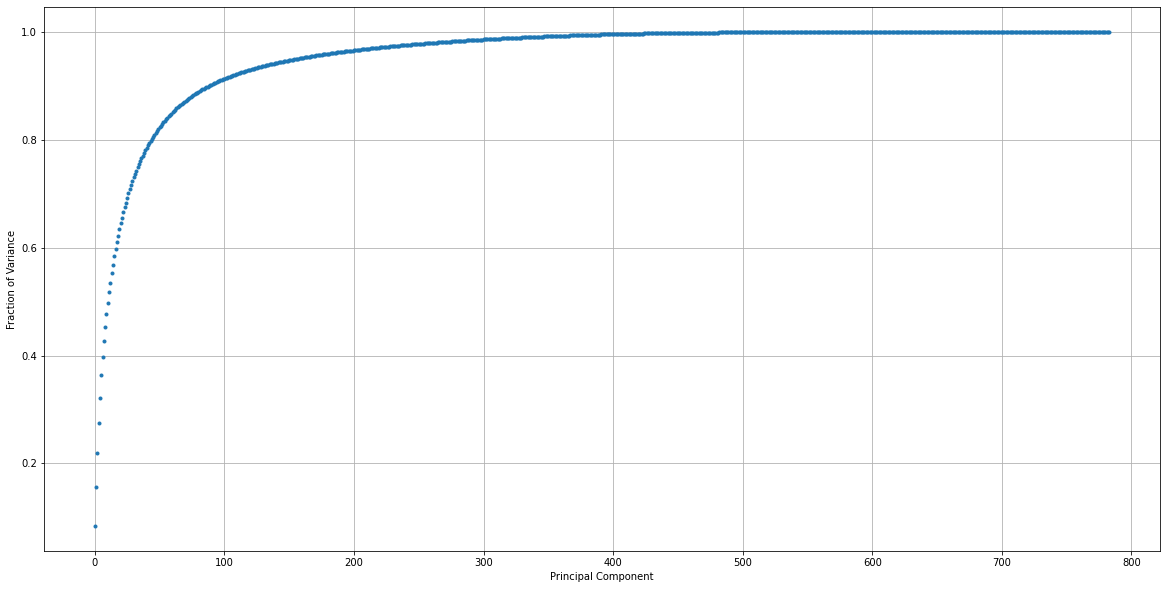

In [289]:
# 위 식대로 FoV값을 구한다.
cumsumS = np.cumsum(S)
sumS = np.sum(S)
FoV = cumsumS / sumS

plt.figure(figsize=(20, 10))
plt.plot(FoV, marker='.', ls=" ")
plt.grid(True)
plt.xlabel("Principal Component")
plt.ylabel("Fraction of Variance")
plt.show()

In [290]:
#percentage값을 인수로 받아서, 최소 component개수 출력하는 함수
def findAtLeast(percentage):
  estimateNumber = np.min(np.where(FoV >= percentage/100))
  print("We need at least {} principal components to capture {}% of the total variance.".format(estimateNumber, percentage))

findAtLeast(60)
findAtLeast(70)
findAtLeast(80)
findAtLeast(99)

We need at least 17 principal components to capture 60% of the total variance.
We need at least 26 principal components to capture 70% of the total variance.
We need at least 44 principal components to capture 80% of the total variance.
We need at least 333 principal components to capture 99% of the total variance.


### Low-dimensional reconstruction

$\hat{x}_i = \overline{x} + \sum_{k=1}^K (x_i\cdot e_k) e_k$<br>
where<br>
$x_i$ is the i-th image sample,<br>
$e_k$ is the eigenvector of k-th largest eigenvalue,<br>
$\overline{x}$ is the mean of entire images,<br>
$\hat{x}_i$ is the reconstructed image from $K$ eigenvectors.

In [0]:
# K는 최대 28*28=784개 가능 문제에서 100까지라고 했으므로 100으로 설정.
K_number = 100
X_mean = np.mean(vectorX[n-1], axis=0)

X_i = np.zeros((1,dim))
for k in range(K_number):
    X_i += np.dot(np.dot(vectorX[n-1],UT[k]),UT[k])

X_i += X_mean

### Visualize mean image

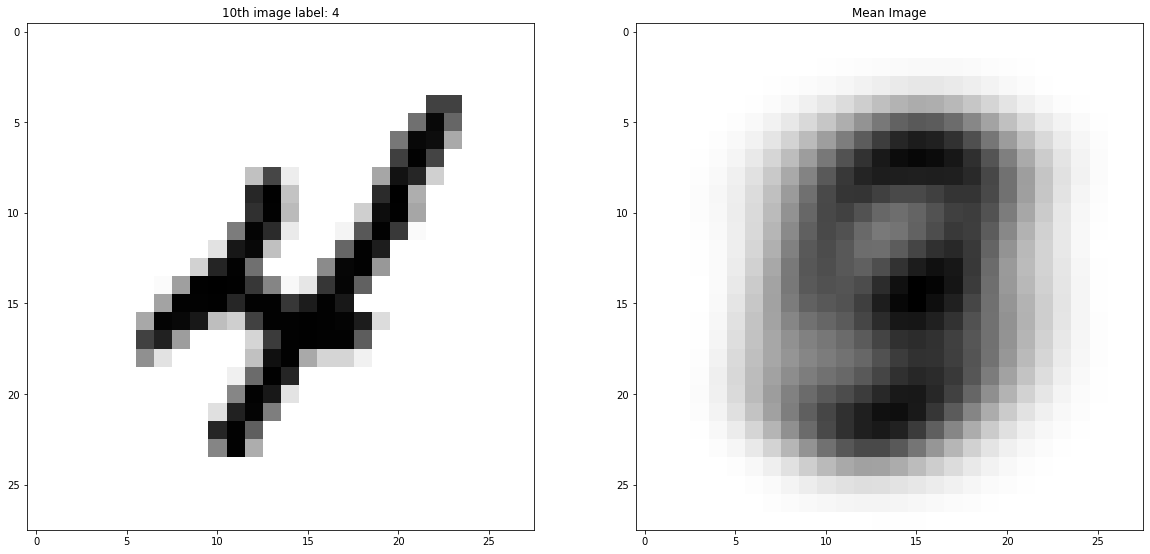

In [292]:
fig = plt.figure(figsize=(20, 10))
p1 = fig.add_subplot(1, 2, 1)
p2 = fig.add_subplot(1, 2, 2)

#모든 이미지들의 평균 벡터 값
wholeMean = np.mean(vectorX, axis=0)

p1.imshow(X[n-1], cmap='gray_r')
p1.set_title("{}th image label: {}".format(n, y[n-1]))
p2.imshow(wholeMean.reshape(height, width), cmap='gray_r')
p2.set_title("Mean Image")
fig.show()

### Visualize the reconstruction of image

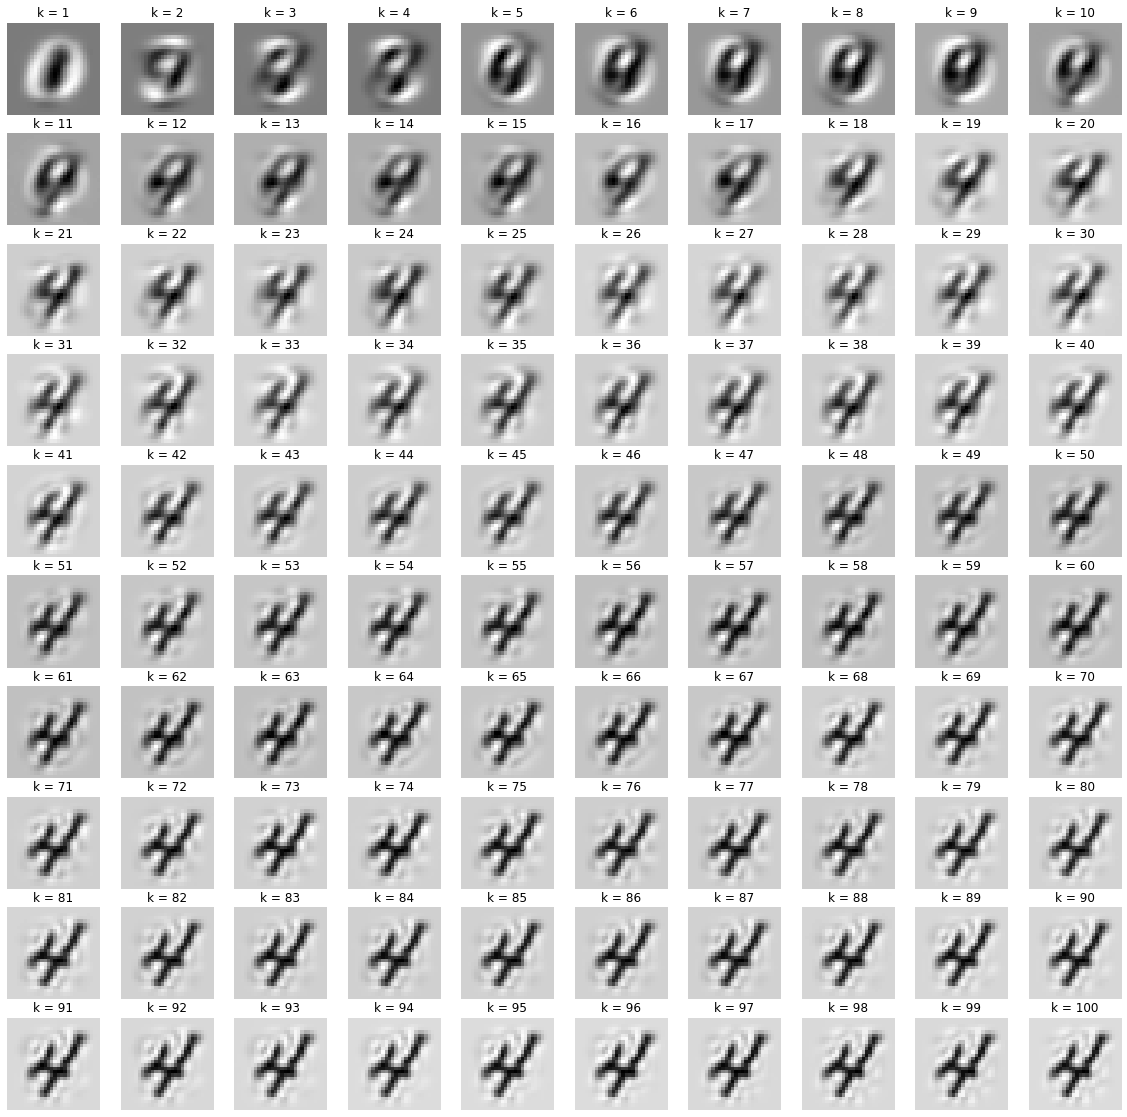

In [293]:
# K 횟수만큼 (xi⋅ek)ek를 중첩시키면서 정확도가 향상됨을 확인 할 수 있다.
fig = plt.figure(figsize=(20, 20))

for K_number in range(1, 101):
  p = fig.add_subplot(10, 10, K_number)

  X_i = np.zeros((1,dim))
  for k in range(K_number):
      X_i += np.dot(np.dot(vectorX[n-1],UT[k]),UT[k])

  X_i += X_mean

  p.imshow(X_i.reshape(height, width), cmap='gray_r')
  p.set_title("k = {}".format(K_number))
  p.axis('off')